In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [136]:
data = pd.read_csv("titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [137]:
data.shape

(891, 12)

# Analysing the Data

In [138]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [140]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [141]:
data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [142]:
data.Survived.skew()

0.4785234382949897

In [143]:
data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: >

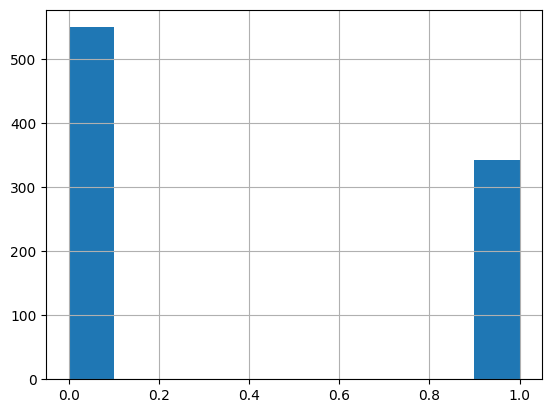

In [144]:
data.Survived.hist()

# Handling Missing Values

In [145]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [146]:
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [147]:
data.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

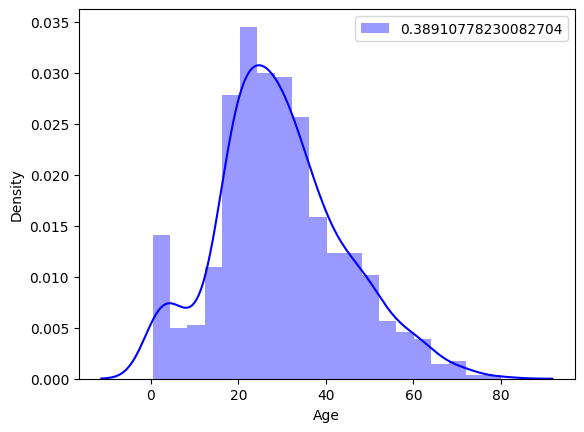

In [148]:
sns.distplot(data['Age'], label = data['Age'].skew(), color = 'b')
plt.legend()
plt.show()

In [149]:
data.Age.skew()

0.38910778230082704

In [150]:
-0.5 < 0.38 < 0.5

True

In [151]:
data.Age.mean()

29.69911764705882

In [152]:
data.Age.median()

28.0

In [153]:
data.Age.fillna(data.Age.mean(), inplace = True)

In [154]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
data.drop(['Cabin'], axis= 1, inplace = True)

In [156]:
data.shape

(891, 11)

In [157]:
data.dropna(inplace = True)

In [158]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

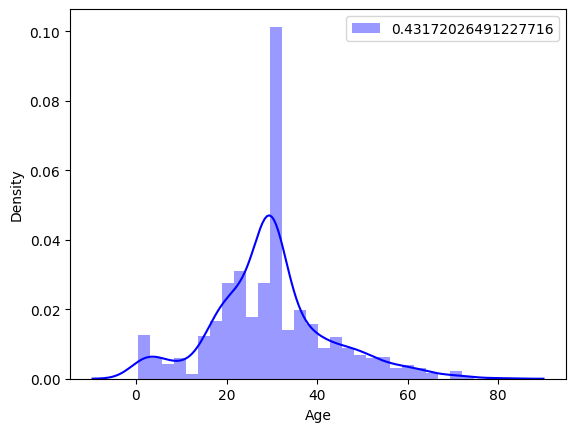

In [159]:
sns.distplot(data['Age'], label = data['Age'].skew(), color = 'b')
plt.legend()
plt.show()

In [160]:
def attribute_info(df_feature):
    print(f'Description of features: \n {df_feature.describe()}\n')
    print(f'Value Counts: \n {df_feature.value_counts()}\n')
    print(f'Unique values: \n {df_feature.unique()}\n')
    print(f'Missing values: \n {df_feature.isna().sum()}\n')
    print(f'Missing values in %: \n {df_feature.isna().mean()}\n')

In [161]:
for col in data:
    print(f'\033[1m -------------------------------------------{col}-----------------------------------')
    print('\n\n')
    attribute_info(data[col])
    print('\n\n')

 -------------------------------------------PassengerId-----------------------------------



Description of features: 
 count    889.000000
mean     446.000000
std      256.998173
min        1.000000
25%      224.000000
50%      446.000000
75%      668.000000
max      891.000000
Name: PassengerId, dtype: float64

Value Counts: 
 PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
302    1
303    1
304    1
305    1
891    1
Name: count, Length: 889, dtype: int64

Unique values: 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 1

# Outlier Detection

<Axes: >

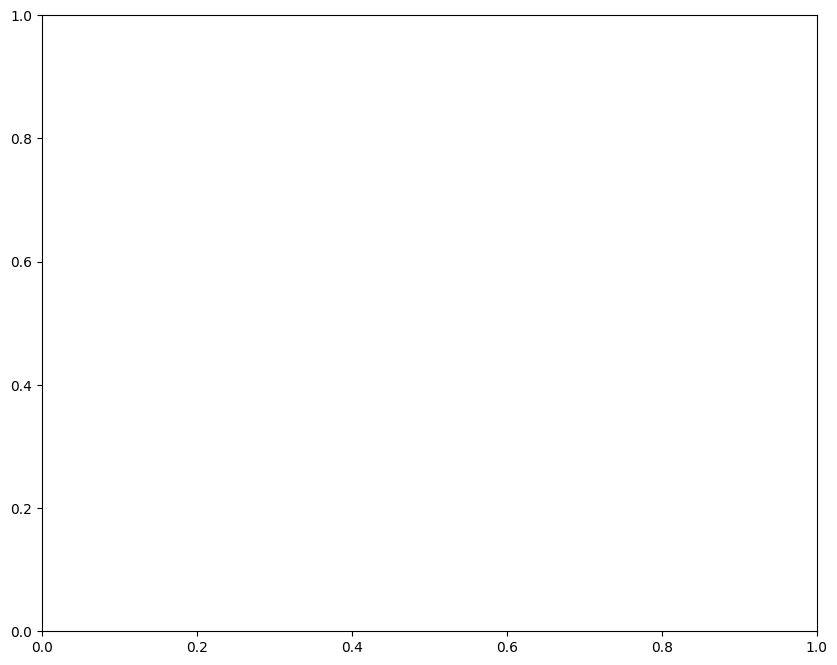

In [162]:
plt.figure(figsize = (10, 8))
sns.boxplot()

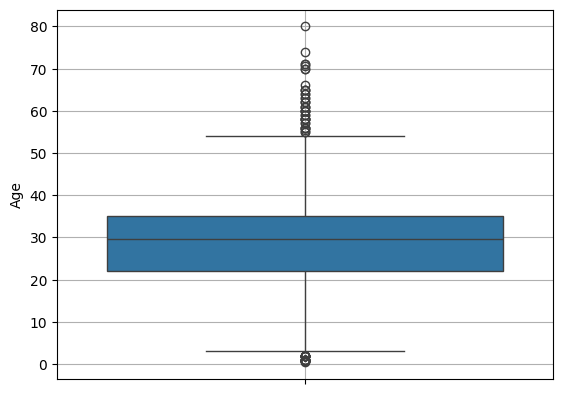

In [163]:
sns.boxplot(data['Age'])
plt.grid()
plt.show()

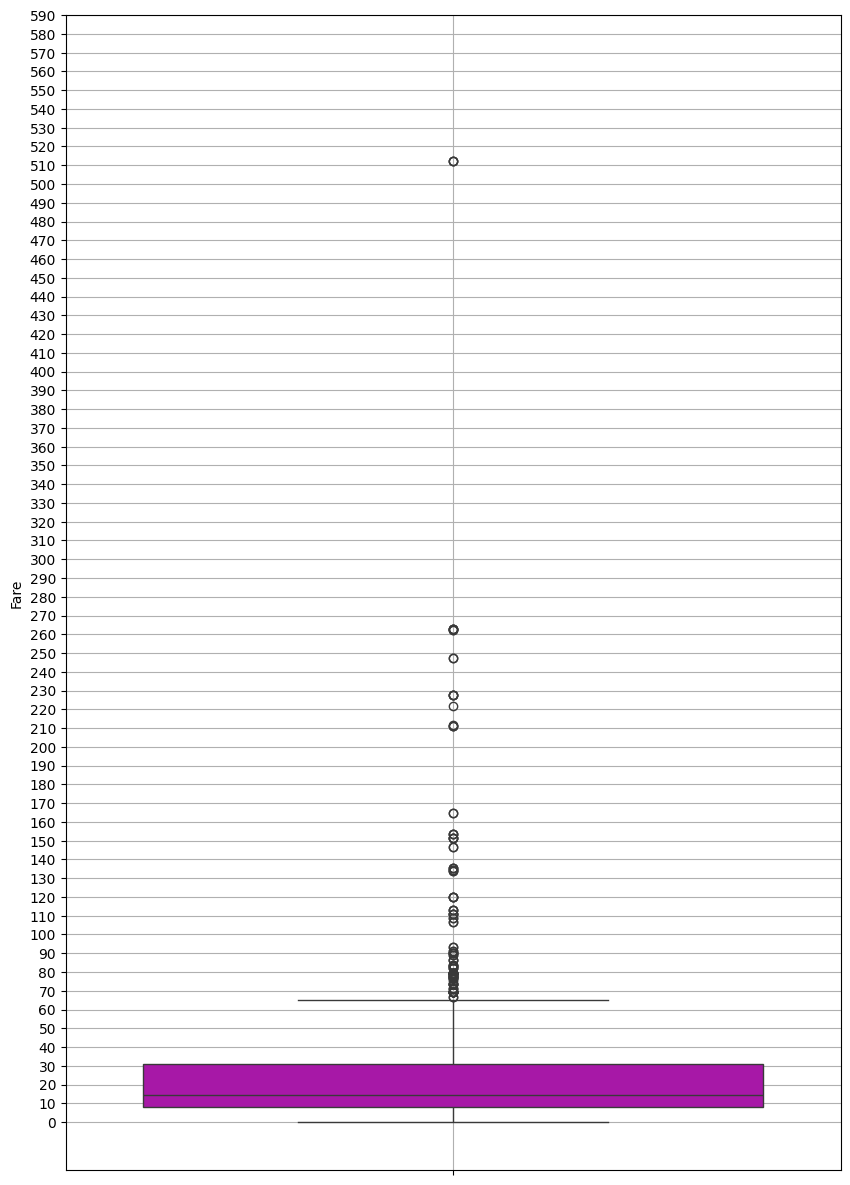

In [164]:
plt.figure(figsize = (10, 15))
sns.boxplot(data['Fare'], color = 'm')
plt.grid()
plt.yticks(np.arange(0, 600, 10))
plt.show()

In [165]:
len(data[data.Fare > 90])

57

In [166]:
data[data.Fare > 90].index

Index([ 27,  31,  88, 118, 195, 215, 258, 268, 269, 291, 297, 299, 305, 306,
       307, 311, 318, 319, 325, 332, 334, 337, 341, 373, 377, 380, 390, 393,
       435, 438, 484, 498, 505, 520, 527, 537, 544, 550, 557, 581, 609, 659,
       660, 679, 689, 698, 700, 708, 716, 730, 737, 742, 763, 779, 802, 820,
       856],
      dtype='int64')

In [167]:
data.drop(index = [27,  31,  88, 118, 195, 215, 258, 268, 269, 291, 297, 299, 305, 306,
       307, 311, 318, 319, 325, 332, 334, 337, 341, 373, 377, 380, 390, 393,
       435, 438, 484, 498, 505, 520, 527, 537, 544, 550, 557, 581, 609, 659,
       660, 679, 689, 698, 700, 708, 716, 730, 737, 742, 763, 779, 802, 820,
       856], axis = 0, inplace = True)

In [168]:
data.shape

(832, 11)

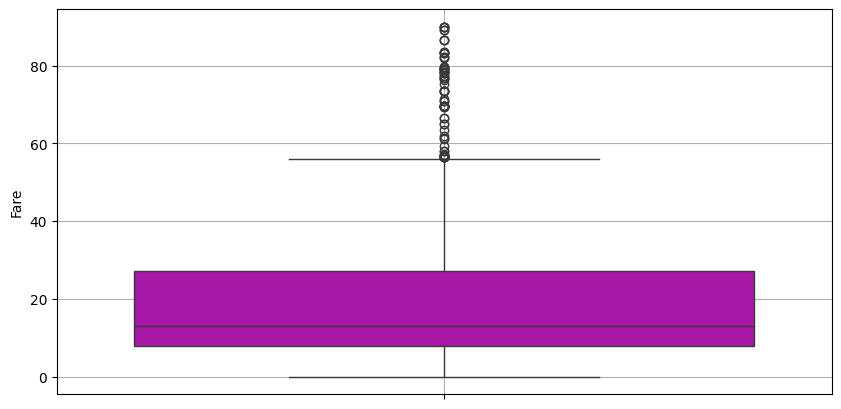

In [172]:
plt.figure(figsize = (10, 5))
sns.boxplot(data['Fare'], color = 'm')
plt.grid()
plt.show()

In [173]:
len(data[data.Fare > 60])

63

In [174]:
data[data.Fare > 60].index

Index([  1,  34,  52,  54,  62,  72,  92,  97, 102, 120, 124, 139, 151, 155,
       159, 180, 201, 218, 224, 230, 245, 256, 257, 262, 275, 290, 310, 324,
       336, 366, 369, 375, 385, 412, 445, 453, 486, 496, 504, 540, 558, 585,
       587, 591, 615, 627, 641, 645, 655, 665, 681, 741, 745, 754, 759, 765,
       789, 792, 835, 846, 849, 863, 879],
      dtype='int64')

In [175]:
data.drop(index = [1,  34,  52,  54,  62,  72,  92,  97, 102, 120, 124, 139, 151, 155,
       159, 180, 201, 218, 224, 230, 245, 256, 257, 262, 275, 290, 310, 324,
       336, 366, 369, 375, 385, 412, 445, 453, 486, 496, 504, 540, 558, 585,
       587, 591, 615, 627, 641, 645, 655, 665, 681, 741, 745, 754, 759, 765,
       789, 792, 835, 846, 849, 863, 879], axis = 0, inplace = True)

In [176]:
data.shape

(769, 11)

In [177]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [179]:
data['Gender'] = data['Sex'].map({'male': 0, 'female': 1})

In [180]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0


In [181]:
data.drop(columns = ['PassengerId', 'Sex', 'Name', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [182]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.000000,1,0,7.2500,0
2,1,3,26.000000,0,0,7.9250,1
3,1,1,35.000000,1,0,53.1000,1
4,0,3,35.000000,0,0,8.0500,0
5,0,3,29.699118,0,0,8.4583,0
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,1
888,0,3,29.699118,1,2,23.4500,1
889,1,1,26.000000,0,0,30.0000,0


In [183]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
Survived,1.000000,-0.241958,-0.118714,-0.004884,0.091691,0.236257,0.498280
Pclass,-0.241958,1.000000,-0.334853,0.114251,0.094276,-0.581680,-0.016624
Age,-0.118714,-0.334853,1.000000,-0.344162,-0.222809,0.054437,-0.129357
SibSp,-0.004884,0.114251,-0.344162,1.000000,0.412207,0.385865,0.143673
Parch,0.091691,0.094276,-0.222809,0.412207,1.000000,0.325501,0.286648
Fare,0.236257,-0.581680,0.054437,0.385865,0.325501,1.000000,0.138923
Gender,0.498280,-0.016624,-0.129357,0.143673,0.286648,0.138923,1.000000


<Axes: >

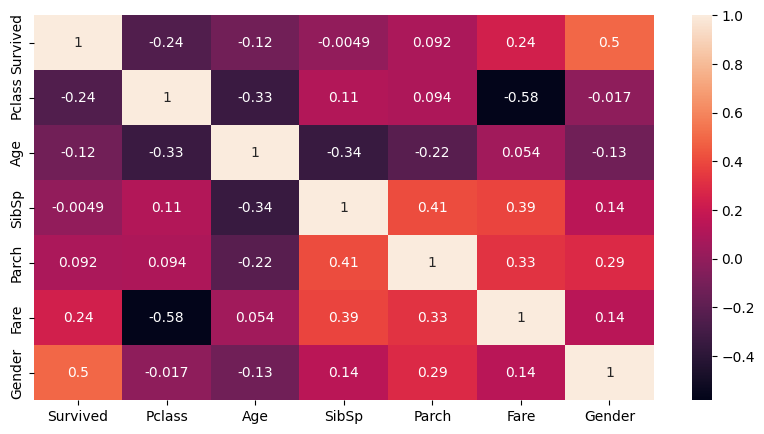

In [184]:
plt.figure(figsize = (10, 5))
sns.heatmap(data.corr(), annot = True)

In [190]:
dcor = abs(data.corr()['Survived'])

In [192]:
dcor.sort_values(ascending = False)

Survived    1.000000
Gender      0.498280
Pclass      0.241958
Fare        0.236257
Age         0.118714
Parch       0.091691
SibSp       0.004884
Name: Survived, dtype: float64

# Model Building

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score

In [194]:
data[:5]

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.000000,1,0,7.2500,0
2,1,3,26.000000,0,0,7.9250,1
3,1,1,35.000000,1,0,53.1000,1
4,0,3,35.000000,0,0,8.0500,0
5,0,3,29.699118,0,0,8.4583,0


In [197]:
X = data.iloc[:, 1:]
X

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.000000,1,0,7.2500,0
2,3,26.000000,0,0,7.9250,1
3,1,35.000000,1,0,53.1000,1
4,3,35.000000,0,0,8.0500,0
5,3,29.699118,0,0,8.4583,0
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0
887,1,19.000000,0,0,30.0000,1
888,3,29.699118,1,2,23.4500,1
889,1,26.000000,0,0,30.0000,0


In [198]:
Y = data.Survived
Y

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 769, dtype: int64

In [199]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [200]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Gender
68,3,17.000000,4,2,7.925,1
719,3,33.000000,0,0,7.775,0
408,3,21.000000,0,0,7.775,0
347,3,29.699118,1,0,16.100,1
263,1,40.000000,0,0,0.000,0
...,...,...,...,...,...,...
80,3,22.000000,0,0,9.000,0
121,3,29.699118,0,0,8.050,0
314,2,43.000000,1,1,26.250,0
508,3,28.000000,0,0,22.525,0


In [201]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Gender
780,3,13.000000,0,0,7.2292,1
383,1,35.000000,1,0,52.0000,1
726,2,30.000000,3,0,21.0000,1
805,3,31.000000,0,0,7.7750,0
552,3,29.699118,0,0,7.8292,0
...,...,...,...,...,...,...
418,2,30.000000,0,0,13.0000,0
621,1,42.000000,1,0,52.5542,0
406,3,51.000000,0,0,7.7500,0
349,3,42.000000,0,0,8.6625,0


In [202]:
Y_train

68     1
719    0
408    0
347    1
263    0
      ..
80     0
121    0
314    0
508    0
115    0
Name: Survived, Length: 615, dtype: int64

In [203]:
Y_test

780    1
383    1
726    1
805    0
552    0
      ..
418    0
621    1
406    0
349    0
538    0
Name: Survived, Length: 154, dtype: int64

In [204]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [205]:
lr.score(X, Y)

0.7919375812743823

In [207]:
Y_pred_train = lr.predict(X_train)
Y_pred_test = lr.predict(X_test)

In [208]:
Y_train

68     1
719    0
408    0
347    1
263    0
      ..
80     0
121    0
314    0
508    0
115    0
Name: Survived, Length: 615, dtype: int64

In [209]:
Y_pred_train

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

# Evaluation Metrics

### For Training Data

In [210]:
confusion_matrix(Y_train, Y_pred_train)

array([[341,  57],
       [ 75, 142]], dtype=int64)

<Axes: >

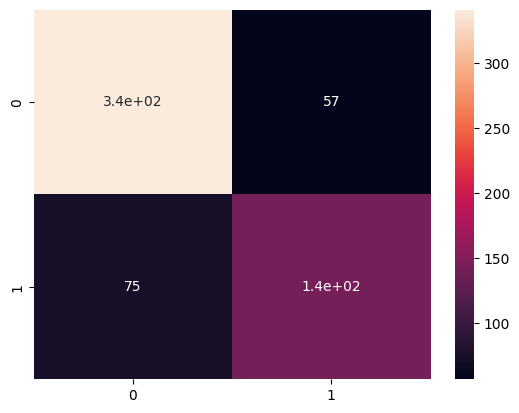

In [211]:
sns.heatmap(confusion_matrix(Y_train, Y_pred_train), annot = True)

In [212]:
accuracy_score(Y_train, Y_pred_train)

0.7853658536585366

In [213]:
print(classification_report(Y_train, Y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       398
           1       0.71      0.65      0.68       217

    accuracy                           0.79       615
   macro avg       0.77      0.76      0.76       615
weighted avg       0.78      0.79      0.78       615



### For Test Data

<Axes: >

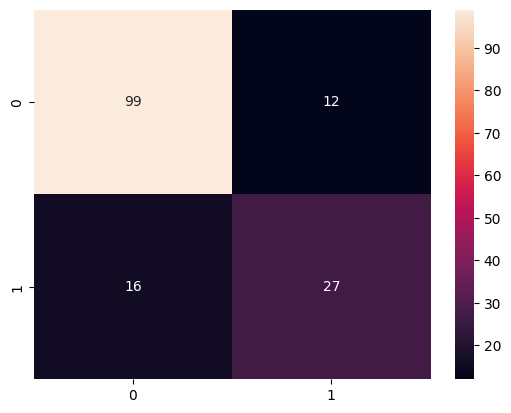

In [214]:
sns.heatmap(confusion_matrix(Y_test, Y_pred_test), annot = True)

In [215]:
accuracy_score(Y_test, Y_pred_test)

0.8181818181818182

In [216]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       111
           1       0.69      0.63      0.66        43

    accuracy                           0.82       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.82      0.82       154



# Exploring Different Algorithms

In [217]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Support Vector Machines

In [218]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [219]:
svc.score(X, Y)

0.7126137841352406

In [220]:
svc_pred_test = svc.predict(X_test)

In [221]:
accuracy_score(Y_test, svc_pred_test)

0.7727272727272727

## Decision Tree

In [242]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [243]:
dt.score(X, Y)

0.8439531859557867

In [244]:
dt_pred_test = dt.predict(X_test)

In [245]:
accuracy_score(Y_test, dt_pred_test)

0.8311688311688312

## Random Forest Classifier

In [246]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [247]:
rf.score(X, Y)

0.9401820546163849

In [248]:
rf_pred_test = rf.predict(X_test)

In [249]:
accuracy_score(Y_test, Y_pred_test)

0.8181818181818182

## Gradient Boosting

In [251]:
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

GradientBoostingClassifier()

In [252]:
gb.score(X, Y)

0.8803641092327699

In [253]:
gb_pred_test = gb.predict(X_test)

In [254]:
accuracy_score(Y_test, gb_pred_test)

0.8441558441558441

## Hyperparameter with Logistic Regression

In [255]:
from sklearn.model_selection import GridSearchCV

In [257]:
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1.0, 0.1, 0.01, 0.001],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}

print(parameters)

{'penalty': ['l1', 'l2', 'elasticnet'], 'C': [1.0, 0.1, 0.01, 0.001], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'max_iter': [100, 200, 500, 1000]}


In [258]:
classifier = LogisticRegression()

grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 5, verbose = 3)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END C=1.0, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.797 total time=   0.0s
[CV 2/5] END C=1.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 3/5] END C=1.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.813 total time=   0.0s
[CV 4/5] END C=1.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.789 total time=   0.0s
[CV 5/5] END C=1.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.707 total time=   0.0s
[CV 1/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01, 0.001],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=3)

In [259]:
grid_search.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [260]:
grid_search.best_score_

0.7788617886178862

In [262]:
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_}')
print('\n')

#Training Evaluation
best_classifier = grid_search.best_estimator_
Y_pred_train_hyper = best_classifier.predict(X_train)
score = accuracy_score(Y_train, Y_pred_train_hyper)
print(f'Training Accuracy: {score}')

#Test Evaluation
best_classifier = grid_search.best_estimator_
Y_pred_test_hyper = best_classifier.predict(X_test)
score = accuracy_score(Y_test, Y_pred_test_hyper)
print(f'Test Accuracy: {score}')

Best Hyperparameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.7788617886178862


Training Accuracy: 0.7869918699186992
Test Accuracy: 0.8116883116883117


## Manually Applying the Parameters

In [264]:
model = LogisticRegression(C = 1.0, max_iter = 100, penalty = 'l2', solver = 'lbfgs')
model.fit(X_train, Y_train)

LogisticRegression()

In [265]:
model_pred_train = model.predict(X_train)
model_pred_test = model.predict(X_test)

In [266]:
confusion_matrix(Y_train, model_pred_train)

array([[341,  57],
       [ 75, 142]], dtype=int64)

In [267]:
accuracy_score(Y_train, model_pred_train)

0.7853658536585366

In [268]:
confusion_matrix(Y_test, model_pred_test)

array([[99, 12],
       [16, 27]], dtype=int64)

In [269]:
accuracy_score(Y_test, model_pred_test)

0.8181818181818182